In [2]:
#Nama  : Ammar Ramadhan
#NIM   : 221011402334
#Kelas : 05 TPLM 006 
# UAS Kecerdasan Buatan

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [16]:
print("Kecepatan Pelayanan:", kecepatan_pelayanan)
print("Kualitas Makanan:", kualitas_makanan)
print("Suasana Restoran:", suasana_restoran)

Kecepatan Pelayanan: Antecedent: kecepatan_pelayanan
Kualitas Makanan: Antecedent: kualitas_makanan
Suasana Restoran: Antecedent: suasana_restoran


In [17]:
# 1. Definisikan Variabel Input dan Output
kecepatan_pelayanan = ctrl.Antecedent(np.arange(0, 61, 1), 'kecepatan_pelayanan')
kualitas_makanan = ctrl.Antecedent(np.arange(1, 6, 1), 'kualitas_makanan')
suasana_restoran = ctrl.Antecedent(np.arange(1, 6, 1), 'suasana_restoran')
tingkat_kebahagiaan = ctrl.Consequent(np.arange(0, 101, 1), 'tingkat_kebahagiaan')

In [18]:
# 2. Definisikan Fungsi Keanggotaan
kecepatan_pelayanan['buruk'] = fuzz.trapmf(kecepatan_pelayanan.universe, [0, 0, 20, 30])
kecepatan_pelayanan['cukup'] = fuzz.trapmf(kecepatan_pelayanan.universe, [20, 30, 40, 50])
kecepatan_pelayanan['baik'] = fuzz.trapmf(kecepatan_pelayanan.universe, [40, 50, 60, 60])

kualitas_makanan['kurang'] = fuzz.trapmf(kualitas_makanan.universe, [1, 1, 2, 3])
kualitas_makanan['cukup'] = fuzz.trapmf(kualitas_makanan.universe, [2, 3, 3, 4])
kualitas_makanan['enak'] = fuzz.trapmf(kualitas_makanan.universe, [3, 4, 5, 5])

suasana_restoran['kurang'] = fuzz.trapmf(suasana_restoran.universe, [1, 1, 2, 3])
suasana_restoran['cukup'] = fuzz.trapmf(suasana_restoran.universe, [2, 3, 3, 4])
suasana_restoran['nyaman'] = fuzz.trapmf(suasana_restoran.universe, [3, 4, 5, 5])

tingkat_kebahagiaan['tidak_bahagia'] = fuzz.trapmf(tingkat_kebahagiaan.universe, [0, 0, 30, 50])
tingkat_kebahagiaan['cukup_bahagia'] = fuzz.trapmf(tingkat_kebahagiaan.universe, [30, 50, 60, 80])
tingkat_kebahagiaan['sangat_bahagia'] = fuzz.trapmf(tingkat_kebahagiaan.universe, [60, 80, 100, 100])


In [19]:
# 3. Definisikan Rules
rule1 = ctrl.Rule(
    kecepatan_pelayanan['buruk'] & kualitas_makanan['kurang'] & suasana_restoran['kurang'],
    tingkat_kebahagiaan['tidak_bahagia']
)
rule2 = ctrl.Rule(
    kecepatan_pelayanan['cukup'] & kualitas_makanan['cukup'] & suasana_restoran['cukup'],
    tingkat_kebahagiaan['cukup_bahagia']
)
rule3 = ctrl.Rule(
    kecepatan_pelayanan['baik'] & kualitas_makanan['enak'] & suasana_restoran['nyaman'],
    tingkat_kebahagiaan['sangat_bahagia']
)
rule4 = ctrl.Rule(
    kecepatan_pelayanan['buruk'] & kualitas_makanan['enak'] & suasana_restoran['nyaman'],
    tingkat_kebahagiaan['cukup_bahagia']
)
rule5 = ctrl.Rule(
    kecepatan_pelayanan['baik'] & kualitas_makanan['kurang'] & suasana_restoran['kurang'],
    tingkat_kebahagiaan['tidak_bahagia']
)

In [20]:
# 4. Membuat Sistem Fuzzy
sistem_fuzzy = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
simulasi_fuzzy = ctrl.ControlSystemSimulation(sistem_fuzzy)

In [21]:
# 5. Input Nilai
simulasi_fuzzy.input['kecepatan_pelayanan'] = 35
simulasi_fuzzy.input['kualitas_makanan'] = 4
simulasi_fuzzy.input['suasana_restoran'] = 4

In [22]:
# 6. Hitung Sistem Fuzzy
simulasi_fuzzy.compute()

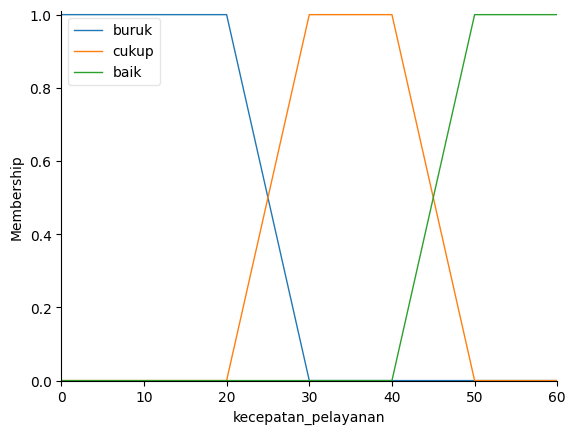

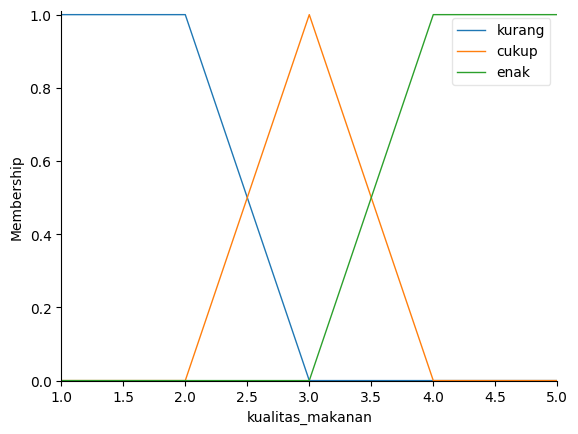

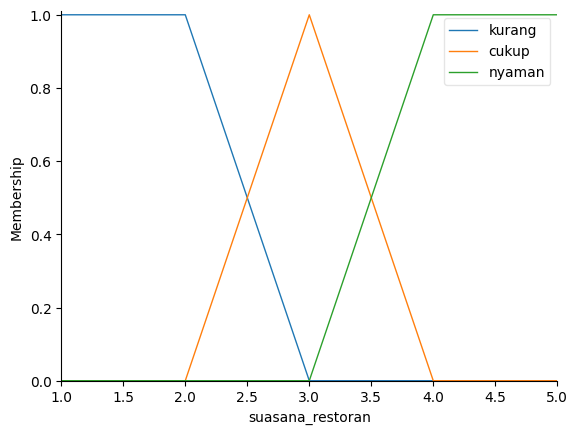

In [23]:
# 7. Visualisasi output
kecepatan_pelayanan.view()
kualitas_makanan.view()
suasana_restoran.view()


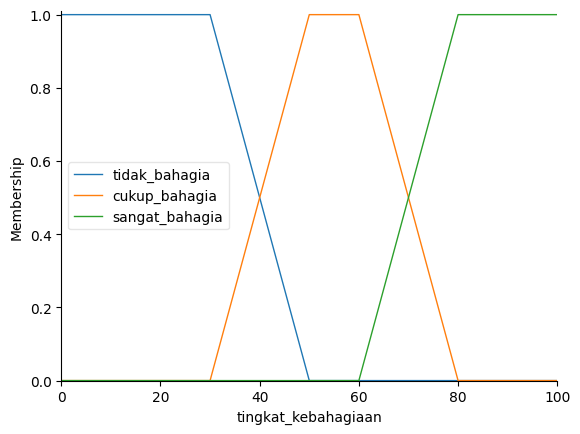

In [24]:

# 8. Visualisasi output
tingkat_kebahagiaan.view(sim=simulasi_fuzzy)